# Exploratory Data Analysis - Understanding Your Dataset

Welcome to the second notebook of the exploratory data analysis (EDA) series, where you will get your hands dirty applying the skills you have learned in the course on an actual data problem, similar to those you might encouter in real life! This is a part of a series, which contains five notebooks, each of them placed on different weeks of this course. There is very little mathematics instruction in these notebooks, but rather practical implementations of the concepts you learned using various python libraries.

For this notebook you will use the data on ridesharing in the year 2022 in the city of Chicago, which can be found [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data).

We have already downloaded the dataset for you and put it in the folder together with this notebook. If you check the link above, you might notice that the dataset includes hundreds of millions of rows. This translates to tens of gigabytes and is too large for working in this environment. That's why the dataset has been preprocessed to include only the data from 2022 and downsampled by a factor of 100 to easily fit into the environment and make your experience more pleasant.

In this notebook you will mostly use the Pandas library. If you are not familiar with it, you can check out the Pandas tutorial notebook.

### Learning Objectives:
In this notebook you will use the following concepts from the course in a practical setting:
 - Probability
 - Conditional probability
 - Distributions


# 1. Import the Python Libraries

As usual, the first thing you need to do is import the libraries that you will use in this notebook. `pandas` will help you load and manipulate data, while `matplotlib` will be used for plottting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load the Dataset

The next step is to load the dataset. The dataset has been downsampled by a factor of 100 to work smoothly in this environment.

In [2]:
# Open the dataset
df = pd.read_csv("data/rideshare_2022.csv", parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

# Show the first five rows of the dataset
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,len_date
0,04767642defd6a3825d089ae66183906a89b902d,2022-01-01,2022-01-01 01:15:00,3905.0,44.5,1.703104e+10,NaN,4.0,NaN,55.0,...,66.25,0,1,41.972563,-87.678846,POINT (-87.6788459662 41.9725625375),NaN,NaN,NaN,16
1,138de88e19e045d9962f1f669e668f9dcdfbc9fd,2022-01-01,2022-01-01 00:30:00,2299.0,25.0,NaN,NaN,32.0,NaN,32.5,...,46.68,0,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),NaN,NaN,NaN,16
2,249cb7bc8eea309aaa3ef941756df4f62a53a92a,2022-01-01,2022-01-01 00:00:00,275.0,1.5,NaN,NaN,40.0,38.0,7.5,...,8.52,0,1,41.792357,-87.617931,POINT (-87.6179313803 41.7923572233),41.812949,-87.617860,POINT (-87.6178596758 41.8129489392),16
3,36c8a2a4cd85fb32ae32170550d2a4d30b8df8a1,2022-01-01,2022-01-01 00:15:00,243.0,1.0,1.703106e+10,1.703106e+10,6.0,6.0,5.0,...,7.36,0,1,41.936310,-87.651563,POINT (-87.6515625922 41.9363101308),41.943155,-87.640698,POINT (-87.640698076 41.9431550855),16
4,493f7bbcba1d96bf10bd579fe1c4b7ddb95fd3a6,2022-01-01,2022-01-01 00:15:00,364.0,1.3,1.703107e+10,1.703106e+10,7.0,6.0,5.0,...,7.36,0,1,41.921855,-87.646211,POINT (-87.6462109769 41.9218549112),41.936237,-87.656412,POINT (-87.6564115308 41.9362371791),16


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,691088,691089,691090,691091,691092,691093,691094,691095,691096,691097
Trip ID,04767642defd6a3825d089ae66183906a89b902d,138de88e19e045d9962f1f669e668f9dcdfbc9fd,249cb7bc8eea309aaa3ef941756df4f62a53a92a,36c8a2a4cd85fb32ae32170550d2a4d30b8df8a1,493f7bbcba1d96bf10bd579fe1c4b7ddb95fd3a6,5d07bc7d3534b93fd0c862b69b161857a6f43f52,6d6bf89e407ba3d4a95681ea0dfa2e08d3a650cc,7e0776ce5aed9c08fb7ae1366c267937c2101df4,8e49900df0154a3f1fe40fdff266a11d01a7f121,9c2ca52b0b8d0ef8e91a51f3f36b12ea9e0f883f,...,a9a430fa0299447286e9ef8f059943b9aa8c3b01,b47ec92aab303d25a6bf6582415a6f4e04ad4eb7,bf1db02bb45bed585268230a058ab88cc3469fb4,c7d85af3607e891ed2ddc34d6f77f5d05d59cfd6,d1e68638f1c042aae18de7b3b4743d472a31ca15,d9ef6950b69863d6dfcf90c3e51699acdfe95e28,e27e62a864d1df33f45a61d41aa032ce6a7961cf,ea5210285b616ed79fa0ff425beed8444a855eb4,f38b06ee0def89c7167bafade4725b1a3910ec22,fc1437605def2bf850cd02631cd9d422b78d28ad
Trip Start Timestamp,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,...,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00
Trip End Timestamp,2022-01-01 01:15:00,2022-01-01 00:30:00,2022-01-01 00:00:00,2022-01-01 00:15:00,2022-01-01 00:15:00,2022-01-01 00:15:00,2022-01-01 00:15:00,2022-01-01 00:15:00,2022-01-01 00:15:00,2022-01-01 00:15:00,...,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2023-01-01 00:15:00,2022-12-31 11:45:00,2022-12-31 11:45:00,2023-01-01 00:15:00,2023-01-01 00:15:00,2022-12-31 11:45:00
Trip Seconds,3905.0,2299.0,275.0,243.0,364.0,467.0,903.0,142.0,315.0,1201.0,...,497.0,529.0,624.0,519.0,1702.0,258.0,97.0,1653.0,1027.0,269.0
Trip Miles,44.5,25.0,1.5,1.0,1.3,2.2,4.1,0.6,1.2,9.8,...,1.7,1.3,3.0,0.7,24.5,0.5,0.2,18.7,6.7,1.3
Pickup Census Tract,17031040402.0,NaN,NaN,17031063000.0,17031071200.0,17031070600.0,NaN,NaN,17031839100.0,NaN,...,17031221300.0,17031061901.0,17031070200.0,17031062800.0,NaN,17031081403.0,17031839100.0,NaN,NaN,NaN
Dropoff Census Tract,NaN,NaN,NaN,17031061902.0,17031062900.0,17031242000.0,NaN,NaN,17031833000.0,NaN,...,17031241400.0,17031061100.0,17031081100.0,17031070400.0,NaN,17031081403.0,17031320400.0,NaN,NaN,NaN
Pickup Community Area,4.0,32.0,40.0,6.0,7.0,7.0,6.0,28.0,32.0,32.0,...,22.0,6.0,7.0,6.0,NaN,8.0,32.0,60.0,28.0,NaN
Dropoff Community Area,NaN,NaN,38.0,6.0,6.0,24.0,8.0,28.0,28.0,22.0,...,24.0,6.0,8.0,7.0,7.0,8.0,32.0,NaN,6.0,9.0
Fare,55.0,32.5,7.5,5.0,5.0,7.5,12.5,7.5,7.5,17.5,...,5.0,7.5,7.5,5.0,25.0,5.0,2.5,22.5,15.0,5.0


# 3 Explore the Dataset

In the cell above, you have opened the dataset and displayed the first five rows. Have a closer look at the output of the cell above. The dataset consists of the following columns:

- `Trip ID`: A unique identifier for the trip.


- `Trip Start Timestamp`: When the trip started, rounded to the nearest 15 minutes.


- `Trip End Timestamp`: When the trip ended, rounded to the nearest 15 minutes.


- `Trip Seconds`: Time of the trip in seconds.


- `Trip Miles`: Distance of the trip in miles.


- `Pickup Census Tract`: The Census Tract where the trip began. This column often will be blank for locations outside Chicago.


- `Dropoff Census Tract`: The Census Tract where the trip ended. This column often will be blank for locations outside Chicago.


- `Pickup Community Area`: The Community Area where the trip began. This column will be blank for locations outside Chicago.


- `Dropoff Community Area`: The Community Area where the trip ended. This column will be blank for locations outside Chicago.


- `Fare`: The fare for the trip, rounded to the nearest $2.50. 


- `Tip`: The tip for the trip, rounded to the nearest $1.00. Cash tips will not be recorded.


- `Additional Charges`: The taxes, fees, and any other charges for the trip.


- `Trip Total`: Total cost of the trip. This is calculated as the total of the previous columns, including rounding.


- `Shared Trip Authorized`: Whether the customer agreed to a shared trip with another customer, regardless of whether the customer was actually matched for a shared trip.


- `Trips Pooled`: If customers were matched for a shared trip, how many trips, including this one, were pooled. All customer trips from the time the vehicle was empty until it was empty again contribute to this count, even if some customers were never present in the vehicle at the same time. Each trip making up the overall shared trip will have a separate record in this dataset, with the same value in this column.


- `Pickup Centroid Latitude`: The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Pickup Centroid Longitude`: The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Pickup Centroid Location`: The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Latitude`: The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Longitude`: The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


- `Dropoff Centroid Location`: The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago.


Run the cell below to print out the column names and inspect the number of non-null values and the data type of each column. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691098 entries, 0 to 691097
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     691098 non-null  object        
 1   Trip Start Timestamp        691098 non-null  datetime64[ns]
 2   Trip End Timestamp          691098 non-null  datetime64[ns]
 3   Trip Seconds                691073 non-null  float64       
 4   Trip Miles                  691096 non-null  float64       
 5   Pickup Census Tract         398943 non-null  float64       
 6   Dropoff Census Tract        397574 non-null  float64       
 7   Pickup Community Area       633092 non-null  float64       
 8   Dropoff Community Area      630431 non-null  float64       
 9   Fare                        689952 non-null  float64       
 10  Tip                         689952 non-null  float64       
 11  Additional Charges          689952 non-

## 3.1 Select columns of interest

At this point, you have seen what the dataset looks like. Take a moment to think of your next steps. Which columns would you explore further? Is there a column that has a problematic number of null values? Are there any columns that you are not interested in?

For exploratory data analysis it is perfectly fine to select only the columns that you are interested in and drop the remainder. This will not only make your dataframe easier to work with, but also reduce its size, making your operations faster.

In the cell below you will select a subset of the columns, which are the ones you will be interested in for this notebook. If you keep only the columns that are pre-selected in the cell below, you will reduce the file size by about a half. This can make a difference of whether you can fit the file into the memory or not, especially with larger files. This code will also rename the columns to remove white spaces.

In [5]:
columns_of_interest = ['Trip Start Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tip', 'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude']

df = df[columns_of_interest]

# Rename all the columns to not include whitespace
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})

# Check the info on the cleaned-up dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691098 entries, 0 to 691097
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_start_timestamp        691098 non-null  datetime64[ns]
 1   trip_seconds                691073 non-null  float64       
 2   trip_miles                  691096 non-null  float64       
 3   fare                        689952 non-null  float64       
 4   tip                         689952 non-null  float64       
 5   additional_charges          689952 non-null  float64       
 6   trip_total                  689952 non-null  float64       
 7   shared_trip_authorized      691098 non-null  int64         
 8   trips_pooled                691098 non-null  int64         
 9   pickup_centroid_latitude    635075 non-null  float64       
 10  pickup_centroid_longitude   635075 non-null  float64       
 11  dropoff_centroid_latitude   632163 non-

# 4. Visualize the data

To understand the data better, it often makes sense to visualize it. This helps you understand how the data is distributed. You can start by plotting the number of rides in a given day. For this it would be useful to have another column that just contains the date. The code in the cell below will create a new column which takes the `trip_start_timestamp` and converts it into a date.

In [7]:
df['date'] = pd.to_datetime(df['trip_start_timestamp'].dt.date)

df.head()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date
0,2022-01-01,3905.0,44.5,55.0,0.0,11.25,66.25,0,1,41.972563,-87.678846,NaN,NaN,2022-01-01
1,2022-01-01,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01
2,2022-01-01,275.0,1.5,7.5,0.0,1.02,8.52,0,1,41.792357,-87.617931,41.812949,-87.617860,2022-01-01
3,2022-01-01,243.0,1.0,5.0,0.0,2.36,7.36,0,1,41.936310,-87.651563,41.943155,-87.640698,2022-01-01
4,2022-01-01,364.0,1.3,5.0,0.0,2.36,7.36,0,1,41.921855,-87.646211,41.936237,-87.656412,2022-01-01


array([[<Axes: title={'center': 'date'}>]], dtype=object)

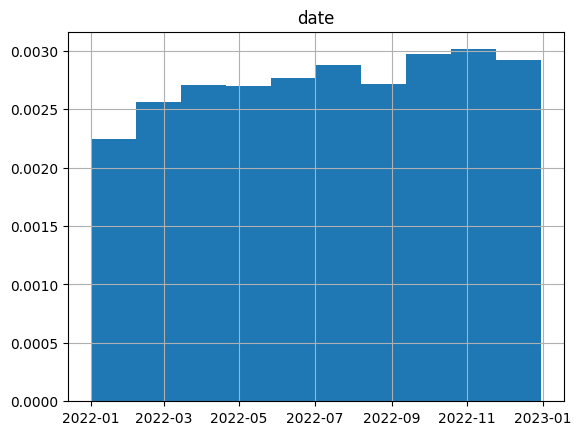

In [8]:
# Select the column which you want to plot.
column_to_plot = 'date'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True)

What you have plotted above is the distribution of the rides throughout the year. Note the code above also set the `dentsity=True`. This is so that the histogram is scaled to look like a probability density function like the ones you saw on Lesson 2. This means scaling the plot so that the area of the bars equals 1. What does this distribution look like to you? Is it similar to any of the distributions you saw in the videos? 

Although the distribution is slightly smaller for earlier dates, you could probably say that the rides are quite uniformly distributed throughout the year. Just note that this is not the actual distribution of the dates of cab rides, but rather an estimate based on the observations you have. Since this is real-world data, there are some fluctuations.

Now change the `column_to_plot` variable above to some other column name to observe the distributions of other variables. Some interesting ones might be `fare`, `tip` or `trip_length`. These variables can tell you how far drivers have to drive and how much they are getting paid for it.

Lets look together at the `tip` column.

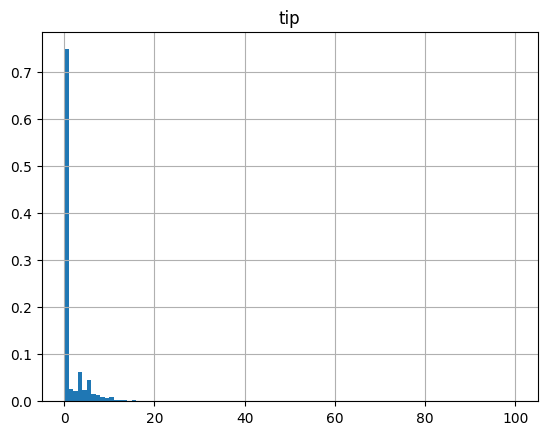

In [9]:
# Select the column which you want to plot.
column_to_plot = 'tip'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True, bins = 100);

What can you say about the distribution of tips? This one looks a bit weird, right? What could explain this strange distribution? What do you think the large bar on the left corresponds to?

What is actually happening here is that the majority of the people do not tip, and that's why you see a large bar at tip = 0. 

Based on the data, you can calculate the probability of the customer tipping. You can do this by simply calculating the proportion of customers that actually tipped from the total number of rides.

In [10]:
# Create a boolean series that distinguishes between tippers and no-tippers
tippers = df['tip'] > 0
# Count the number of tippers
number_of_tippers = tippers.sum()
# Count the total number of rides
total_rides = len(df)

# Calculate the fraction of people who tip
fraction_of_tippers = number_of_tippers / total_rides
print(f'The percentage of riders who tip is {fraction_of_tippers*100:.0f}%.')

The percentage of riders who tip is 25%.


In the next cell you will create a new dataframe, where you will remove the non-tippers (the ones who gave a tip of zero). Then you can replot the histogram and see how it looks without the large bar at tip = 0.

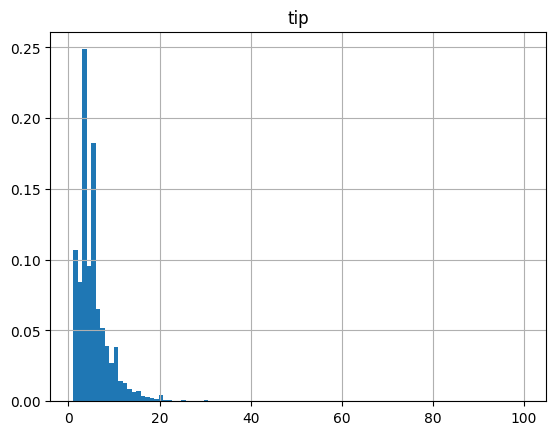

In [11]:
# Create a dataframe That only consists of tippers (conditioned on the boolean series)
df_tippers = df[tippers]

# Now re-plot the above histogram, but only for tippers
df_tippers.hist('tip', density=True, bins = 100);

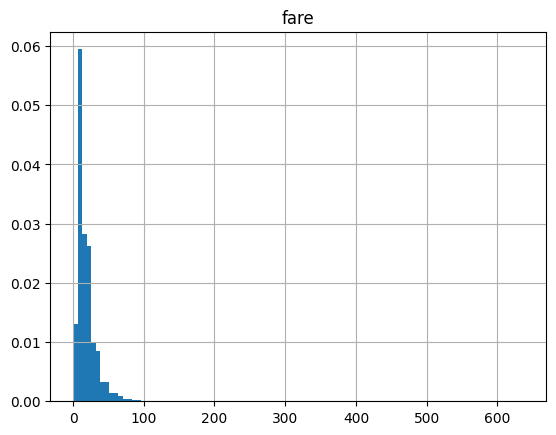

In [12]:
# Select the column which you want to plot.
column_to_plot = 'fare'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True, bins = 100);

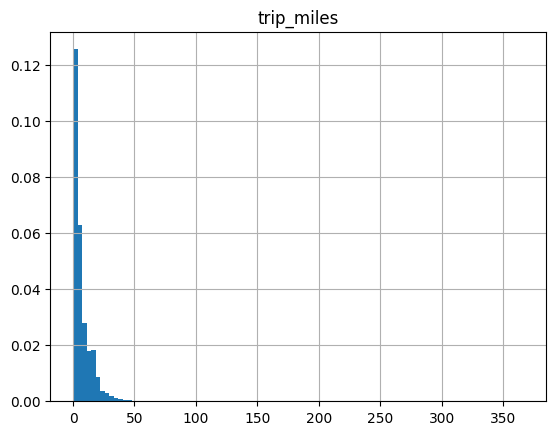

In [14]:
# Select the column which you want to plot.
column_to_plot = 'trip_miles'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True, bins = 100);

You can see now that the distribution got a much more interesting shape. What you are actually doing here is conditioning the original variable `tip`. You are ploting the distribution of tips given that a tip was actually given, or given that `tip>0` if you want it in mathematical terms. In other words, you are discarding part of your data, where `tip=0`, and finding the distribution of the remaining data.

# 5. Split the Data Into Interesting Subsets

The next thing you can check is if you can create any subsets of data and have a look at conditional distributions over these subsets. For example, you might be interested, to know whether there are more rides on the weekend than during the week, or if people tip more on weekends. This can help you figure out whether there are any differences in demand during the week and helps you adjust the supply of drivers.

For this you will first create a new column called `weekday`, where you will store the information on the day of the week.

In [15]:
# Extracting the day of the week is simple when you have it in datetime format.
df['weekday'] = df["date"].dt.day_name()

df.head()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,weekday
0,2022-01-01,3905.0,44.5,55.0,0.0,11.25,66.25,0,1,41.972563,-87.678846,NaN,NaN,2022-01-01,Saturday
1,2022-01-01,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01,Saturday
2,2022-01-01,275.0,1.5,7.5,0.0,1.02,8.52,0,1,41.792357,-87.617931,41.812949,-87.617860,2022-01-01,Saturday
3,2022-01-01,243.0,1.0,5.0,0.0,2.36,7.36,0,1,41.936310,-87.651563,41.943155,-87.640698,2022-01-01,Saturday
4,2022-01-01,364.0,1.3,5.0,0.0,2.36,7.36,0,1,41.921855,-87.646211,41.936237,-87.656412,2022-01-01,Saturday


Now you can count the number of riders on a given day of the week.

In [16]:
# Count the number of rides each day
daily_ride_counts = df['weekday'].value_counts()

# List of weekdays. You will use it to reorder the counts, as they are in random order.
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the series given weekdays
daily_ride_counts = daily_ride_counts.reindex(WEEKDAYS)

daily_ride_counts

weekday
Monday        79013
Tuesday       82576
Wednesday     88034
Thursday      95721
Friday       115923
Saturday     132872
Sunday        96959
Name: count, dtype: int64

And in the same manner, you will calculate the number of tippers on a given day of the week.

In [17]:
df_tippers = df[df['tip'] > 0]
# Count the number of tips given each day
daily_tippers_counts = df_tippers['weekday'].value_counts()

# Reorder the series given weekdays
daily_tippers_counts = daily_tippers_counts.reindex(WEEKDAYS)

daily_tippers_counts

weekday
Monday       19779
Tuesday      20898
Wednesday    22691
Thursday     24210
Friday       29256
Saturday     33215
Sunday       23294
Name: count, dtype: int64

Now you can calculate the percentage of customers tipping on each day of the week.

In [18]:
df_daily_aggregation = pd.concat([daily_ride_counts, daily_tippers_counts], axis=1, keys=['ride_count', 'tippers_count'])
df_daily_aggregation["tips_percentage"] = df_daily_aggregation['tippers_count'] / df_daily_aggregation['ride_count'] * 100

df_daily_aggregation

,ride_count,tippers_count,tips_percentage
weekday,,,
Monday,79013,19779,25.032590
Tuesday,82576,20898,25.307595
Wednesday,88034,22691,25.775269
Thursday,95721,24210,25.292256
Friday,115923,29256,25.237442
Saturday,132872,33215,24.997742
Sunday,96959,23294,24.024588


What you have just calculated are conditional probabilities: What is the probability of someone tipping, given a certain day of the week? Or if you write it with an equation: $ P(tip|weekday) $.
Now you can have another look at the numbers and see if there are some important insights!

You can see that there are significantly more rides on Fridays and Saturdays than on the other days of the week, however the percentage of the tippers does not change much.

You can use the cell below to save your modified dataframe. You dont need to do that, as the dataframe for the next lab is already provided.

In [19]:
# Uncomment the line below if you want to save your dataframe.
# df.to_csv("data/rideshare_2022_user.csv", index=False)

**Congratulations on finishing this lab.** You have used the implementation of quite a few concepts covered in this course: probabilities, distributions and conditional probabilities. On top of that you have practiced Pandas a little bit. If you liked this exercise, look out for another similar notebook next week!